# **KYC Analysis to Improve Client Insights in Telco Provider Company**

# Project Goals

As an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The advertising department wants to know which prepaid plan generates more revenue to adjust the advertising budget.

We will do an initial analysis of these prepaid plans based on a relatively small sample of clients. You will have data on 500 Megaline clients: who they are? where they are from? what kind of package they use?, and the number of calls and messages they sent in 2018. **We will analyze client behavior and determine which prepaid packages bring in more income.**

# Prepaid Package Description

Note: Megaline rounds seconds to minutes, and megabytes rounds to gigabytes. For calls, each individual call is rounded up: even if the call lasts only one second, it will count as one minute. For web traffic, each web session is not rounded up. However, the total for the month is rounded up. If a user spends 1025 megabytes this month, he will be charged for 2 gigabytes.

**Surf**

1. Monthly fee: $20

2. 500 minutes of call duration per month, 50 SMS, and 15 GB of data

3. After exceeding the package limit, will be charged:
     - 1 minute: 3 cents
     - 1 SMS: 3 cents
     - 1GB of data: $10

**Ultimate**

1. Monthly fee: $70

2. 3000 minutes of call duration per month, 1000 SMS, and 30 GB of data

3. After exceeding the package limit, will be charged:

     - 1 minute: 1 cent
     - 1 SMS: 1 cent
     - 1GB of data: $7

# Step 1. Open the data file and learn the general information
```
File path:
/content/megaline_calls.csv
/content/megaline_internet.csv
/content/megaline_messages.csv
/content/megaline_plans.csv
/content/megaline_users.csv
```

# Import Library

In [82]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

#for importing files to google collab
from google.colab import files

In [83]:
#upload datasets
#uploaded = files.upload()

# Load Data and Quality Checking

**Dataset megaline_calls.csv**

In [84]:
calls = pd.read_csv('/content/megaline_calls.csv')

In [85]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [86]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [87]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Dataset megaline_internet.csv**

In [88]:
internet = pd.read_csv('/content/megaline_internet.csv')

In [89]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [90]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [91]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Dataset megaline_messages.csv**

In [92]:
messages = pd.read_csv('/content/megaline_messages.csv')

In [93]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [94]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [95]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Dataset megaline_plans.csv**

In [96]:
plans = pd.read_csv('/content/megaline_plans.csv')

In [97]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [98]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [99]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Dataset megaline_users.csv**

In [100]:
users = pd.read_csv('/content/megaline_users.csv')

In [101]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [102]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [103]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


# Step 2. Prepare the data

- Convert datatypes to a correct one
- Find and eliminate errors in datasets

Describe the errors we found and how we eliminated them. Note: there are some calls that have a duration of 0.0 minutes. This is probably a missed call. It's our decision whether we do elimination for these values or not; consider how much their absence that will affect the outcome of our analysis.

For each user, find:

- Number of calls that has been made and minutes used per month
- Number of SMS sent per month
- Data volume per month
- Monthly income of each user (subtract the free package limit from the total number of calls, SMS and data; multiply the result by the value of the phone plan; add monthly fees depending on the phone plan)

# Data Preparation

1. Data Cleansing
2. Feature Engineering

In [104]:
# 1. Drop Duplicates
# 2. Convert Datatypes
# 3. change data values that do not matched ie; Male, male, MaLe. These values must have a adjusted by standard

In [105]:
# Change to month of year with datatype period
def to_month(dataset, col_name):
    temp_array = pd.to_datetime(dataset[col_name])
    temp_array = temp_array.dt.to_period("M")
    return temp_array

In [106]:
calls['month'] = to_month(calls, 'call_date')
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,2018-12
1,1000_145,1000,2018-12-27,13.66,2018-12
2,1000_247,1000,2018-12-27,14.48,2018-12
3,1000_309,1000,2018-12-28,5.76,2018-12
4,1000_380,1000,2018-12-30,4.22,2018-12


In [107]:
messages['month'] = to_month(messages, 'message_date')
messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,2018-12
1,1000_160,1000,2018-12-31,2018-12
2,1000_223,1000,2018-12-31,2018-12
3,1000_251,1000,2018-12-27,2018-12
4,1000_255,1000,2018-12-26,2018-12


In [108]:
internet['month'] = to_month(internet, 'session_date')
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,2018-12
1,1000_204,1000,2018-12-31,0.00,2018-12
2,1000_379,1000,2018-12-28,660.40,2018-12
3,1000_413,1000,2018-12-26,270.99,2018-12
4,1000_442,1000,2018-12-27,880.22,2018-12


Check the `city` column in the `users` dataset. It needs to be tested for the hypothesis because we have to calculate the average users income in the **NY-NJ** area is different from the users income from another regions.

In [109]:
users.city.unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

There is some non-similar data in the `city` column in the `users` dataset.

In [110]:
# Remove unnecessary city information
users['clean_city'] = users['city'].str.split(', ').str[1]  # split `city` data by comma ',' , and then take the 1st index
users['clean_city'] = users['clean_city'].str.replace(' MSA', '') # Remove `MSA` to make data becomes similar
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA


Data pada kolom 'city' sudah seragam

In [111]:
# Create a flag for NY-NJ
users['is_ny_nj'] = users['clean_city'].str.contains('NY-NJ', regex=True)
users.tail(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,clean_city,is_ny_nj
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN,CA,False
491,1491,Terina,Jensen,22,"Grand Rapids-Kentwood, MI MSA",2018-04-27,surf,2018-09-18,MI,False
492,1492,Elvie,Jones,63,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-03-07,surf,NaN,OR-WA,False
493,1493,Cicely,Wynn,18,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-06,ultimate,NaN,MA-NH,False
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN,NY-NJ-PA,True
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,NY-NJ-PA,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,LA,False
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,CA,False
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,NY-NJ-PA,True
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,FL,False


Add a new column `is_ny_nj` to find **NY-NJ** data more easily

In [112]:
# Round up duration column
calls['duration'] = np.ceil(calls['duration'])
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12


Round up `duration` column

In [113]:
# Aggregate calls per month
calls = pd.pivot_table(calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
calls.head()

,user_id,month,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0


Number of calls that were made and minutes used per month

In [114]:
# Aggregate data messages
messages = pd.pivot_table(messages, index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages.columns = ['user_id', 'month', 'sms']
messages.head()

,user_id,month,sms
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


Number of SMS sent per month

In [115]:
# Aggregate internet per month
internet = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet.head()

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30


In [116]:
# Convert gb_used value from MB to GB with round up
internet['gb_used'] = np.ceil(internet['mb_used'] / 1024)
internet.head()

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0


The amount of user data volume usage per month with additional columns in GB by using round up

# Join Data

# Cross Join

To check the amount of quota usage per month by each user

In [117]:
temp_month = pd.DataFrame(internet.month.unique(), columns=['month']).sort_values('month')
temp_month['key'] = 1
temp_month

,month,key
11,2018-01,1
10,2018-02,1
8,2018-03,1
9,2018-04,1
5,2018-05,1
6,2018-06,1
7,2018-07,1
1,2018-08,1
2,2018-09,1
3,2018-10,1


In [118]:
temp_user_id = pd.DataFrame(users.user_id.unique(), columns=['user_id'])
temp_user_id['key'] = 1
temp_user_id

,user_id,key
0,1000,1
1,1001,1
2,1002,1
3,1003,1
4,1004,1
...,...,...
495,1495,1
496,1496,1
497,1497,1
498,1498,1


Adding a `key` column with 1 value as the Primary Key, which will be used for Cross Join

In [119]:
# Outer Join Method
dataset = temp_user_id.merge(temp_month, on='key', how='outer')

# Join All Table to Dataset

In [120]:
# Join all table
dataset = dataset.merge(users, on='user_id', how='outer')
dataset = dataset.merge(plans, left_on='plan', right_on='plan_name', how='outer')
dataset = dataset.merge(internet, on=['user_id', 'month'], how='outer')
dataset = dataset.merge(calls, on=['user_id', 'month'], how='outer')
dataset = dataset.merge(messages, on=['user_id', 'month'], how='outer')
dataset.head()

,user_id,key,month,first_name,last_name,age,city,reg_date,plan,churn_date,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,mb_used,gb_used,duration,sms
0,1000,1,2018-01,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN
1,1000,1,2018-02,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN
2,1000,1,2018-03,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN
3,1000,1,2018-04,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN
4,1000,1,2018-05,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,...,3000,70,7,0.01,0.01,ultimate,NaN,NaN,NaN,NaN


In [121]:
# Clean unused columns
drop_cols = ['key', 'first_name', 'last_name', 'city', 'plan_name', 'mb_used']
dataset.drop(drop_cols, axis=1, inplace=True)
dataset.head()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms
0,1000,2018-01,45,2018-12-24,ultimate,NaN,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
1,1000,2018-02,45,2018-12-24,ultimate,NaN,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
2,1000,2018-03,45,2018-12-24,ultimate,NaN,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
3,1000,2018-04,45,2018-12-24,ultimate,NaN,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
4,1000,2018-05,45,2018-12-24,ultimate,NaN,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN


In [122]:
dataset['reg_date'] = to_month(dataset, 'reg_date')
dataset['churn_date'] = to_month(dataset, 'churn_date')
dataset.head()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms
0,1000,2018-01,45,2018-12,ultimate,NaT,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
1,1000,2018-02,45,2018-12,ultimate,NaT,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
2,1000,2018-03,45,2018-12,ultimate,NaT,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
3,1000,2018-04,45,2018-12,ultimate,NaT,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN
4,1000,2018-05,45,2018-12,ultimate,NaT,GA,False,1000,30720,3000,70,7,0.01,0.01,NaN,NaN,NaN


Convert the `reg_date` and `churn_date` columns to per month to make it easier for data filtering

In [123]:
# filtered unused data
dataset = dataset.loc[((dataset.reg_date <= dataset.month) & (dataset.churn_date >= dataset.month)) | (dataset.churn_date.isnull())]
dataset.tail()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms
5995,1499,2018-08,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,NaN,NaN,NaN
5996,1499,2018-09,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,13.0,346.0,NaN
5997,1499,2018-10,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,20.0,385.0,NaN
5998,1499,2018-11,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,17.0,308.0,NaN
5999,1499,2018-12,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,22.0,496.0,NaN


In [124]:
dataset['gb_per_month_included'] = np.ceil(dataset['mb_per_month_included'] / 1024)
dataset.tail()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms,gb_per_month_included
5995,1499,2018-08,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,NaN,NaN,NaN,15.0
5996,1499,2018-09,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,13.0,346.0,NaN,15.0
5997,1499,2018-10,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,20.0,385.0,NaN,15.0
5998,1499,2018-11,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,17.0,308.0,NaN,15.0
5999,1499,2018-12,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,22.0,496.0,NaN,15.0


Add `gb_per_month_included` column with round up

In [125]:
dataset.shape

(5784, 19)

In [126]:
# Calculate extra price
def extra_price (value, max_value, cost_extra):
    extra_value = value - max_value
    if extra_value > 0:
        return cost_extra * extra_value
    else:
        return 0

In [127]:
dataset['extra_internet'] = dataset.apply(lambda row: extra_price(value=row['gb_used'], max_value=row['gb_per_month_included'], cost_extra=row['usd_per_gb']), axis=1)

apply `extra_price` formula on each row for data usage rows

In [128]:
dataset.tail()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms,gb_per_month_included,extra_internet
5995,1499,2018-08,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,NaN,NaN,NaN,15.0,0.0
5996,1499,2018-09,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,13.0,346.0,NaN,15.0,0.0
5997,1499,2018-10,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,20.0,385.0,NaN,15.0,50.0
5998,1499,2018-11,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,17.0,308.0,NaN,15.0,20.0
5999,1499,2018-12,37,2018-05,surf,NaT,FL,False,50,15360,500,20,10,0.03,0.03,22.0,496.0,NaN,15.0,70.0


In [129]:
dataset['extra_call'] = dataset.apply(lambda row: extra_price(value=row['duration'], max_value=row['minutes_included'], cost_extra=row['usd_per_minute']), axis=1)

apply the `extra_price` formula on each row for call usage data

In [130]:
dataset.tail()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms,gb_per_month_included,extra_internet,extra_call
5995,1499,2018-08,37,2018-05,surf,NaT,FL,False,50,15360,...,20,10,0.03,0.03,NaN,NaN,NaN,15.0,0.0,0.0
5996,1499,2018-09,37,2018-05,surf,NaT,FL,False,50,15360,...,20,10,0.03,0.03,13.0,346.0,NaN,15.0,0.0,0.0
5997,1499,2018-10,37,2018-05,surf,NaT,FL,False,50,15360,...,20,10,0.03,0.03,20.0,385.0,NaN,15.0,50.0,0.0
5998,1499,2018-11,37,2018-05,surf,NaT,FL,False,50,15360,...,20,10,0.03,0.03,17.0,308.0,NaN,15.0,20.0,0.0
5999,1499,2018-12,37,2018-05,surf,NaT,FL,False,50,15360,...,20,10,0.03,0.03,22.0,496.0,NaN,15.0,70.0,0.0


In [131]:
dataset['extra_sms'] = dataset.apply(lambda row: extra_price(value=row['sms'], max_value=row['messages_included'], cost_extra=row['usd_per_message']), axis=1)

apply the `extra_price` formula to each row for SMS usage data

In [132]:
dataset.tail()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,...,usd_per_gb,usd_per_message,usd_per_minute,gb_used,duration,sms,gb_per_month_included,extra_internet,extra_call,extra_sms
5995,1499,2018-08,37,2018-05,surf,NaT,FL,False,50,15360,...,10,0.03,0.03,NaN,NaN,NaN,15.0,0.0,0.0,0.0
5996,1499,2018-09,37,2018-05,surf,NaT,FL,False,50,15360,...,10,0.03,0.03,13.0,346.0,NaN,15.0,0.0,0.0,0.0
5997,1499,2018-10,37,2018-05,surf,NaT,FL,False,50,15360,...,10,0.03,0.03,20.0,385.0,NaN,15.0,50.0,0.0,0.0
5998,1499,2018-11,37,2018-05,surf,NaT,FL,False,50,15360,...,10,0.03,0.03,17.0,308.0,NaN,15.0,20.0,0.0,0.0
5999,1499,2018-12,37,2018-05,surf,NaT,FL,False,50,15360,...,10,0.03,0.03,22.0,496.0,NaN,15.0,70.0,0.0,0.0


In [133]:
dataset['total_monthly_cost'] = dataset['usd_monthly_pay'] + dataset['extra_internet'] + dataset['extra_call'] + dataset['extra_sms']

In [134]:
dataset.tail()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,...,usd_per_message,usd_per_minute,gb_used,duration,sms,gb_per_month_included,extra_internet,extra_call,extra_sms,total_monthly_cost
5995,1499,2018-08,37,2018-05,surf,NaT,FL,False,50,15360,...,0.03,0.03,NaN,NaN,NaN,15.0,0.0,0.0,0.0,20.0
5996,1499,2018-09,37,2018-05,surf,NaT,FL,False,50,15360,...,0.03,0.03,13.0,346.0,NaN,15.0,0.0,0.0,0.0,20.0
5997,1499,2018-10,37,2018-05,surf,NaT,FL,False,50,15360,...,0.03,0.03,20.0,385.0,NaN,15.0,50.0,0.0,0.0,70.0
5998,1499,2018-11,37,2018-05,surf,NaT,FL,False,50,15360,...,0.03,0.03,17.0,308.0,NaN,15.0,20.0,0.0,0.0,40.0
5999,1499,2018-12,37,2018-05,surf,NaT,FL,False,50,15360,...,0.03,0.03,22.0,496.0,NaN,15.0,70.0,0.0,0.0,90.0


Add a new column `total_monthly_cost` to calculate monthly revenue of each user (subtract the free plan limit from the total number of calls, SMS and data; multiply the result by the value of the phone plan; add monthly fee depends on the phone plan)

# Step 3. Analyze the data

Describe consumer behavior. Find the minutes, messages, and mobile data usage volume required by users of each plan per month. Calculate the mean, variance, and standard deviation. Create a histogram and describe the distribution.

# EDA

Objectives:

The advertising department wants to know which prepaid plan generates more revenue to adjust the advertising budget.

Questions:

1. What is the income per month from each plan?
2. Is there a relationship between the package and the user age?
3. Does the older the person, the more income they can generate?
4. How is the distribution of phone duration per month in each package?
5. How is the internet distribution per month in each package?
6. How is the distribution of SMS per month in each package?
7. How many people who pays extra cost for each plan?

Hypothesis:

1. Is the ultimate plan revenue was higher than surf?

<ipython-input-135-e733e5b41a35>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income = dataset.groupby(['plan', 'month']).sum()['usd_monthly_pay'].reset_index()


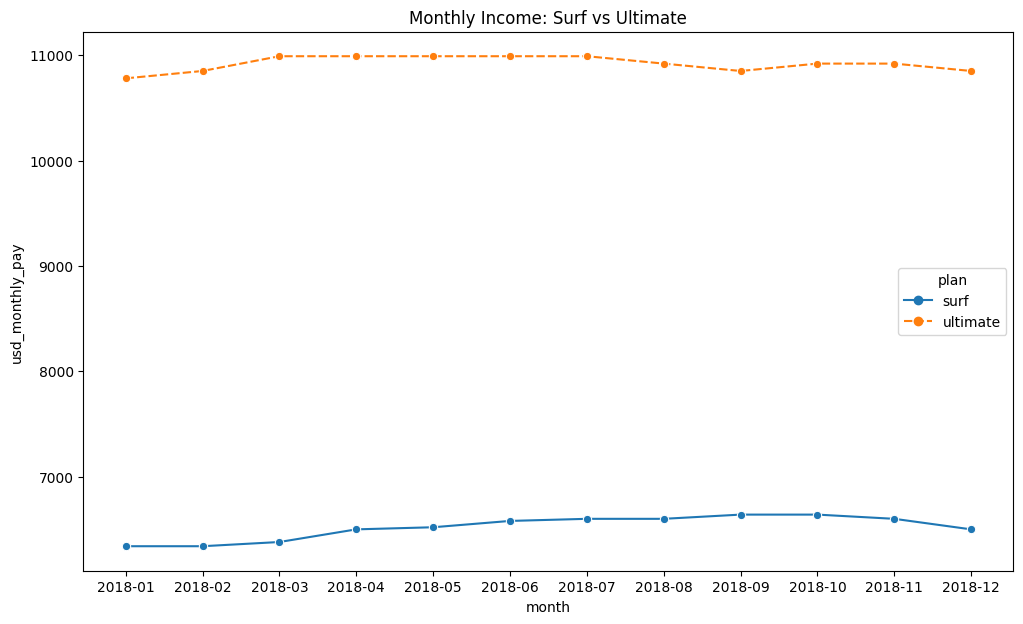

In [135]:
# How is the income per month from each plan?
income = dataset.groupby(['plan', 'month']).sum()['usd_monthly_pay'].reset_index()
income['month'] = income['month'].astype(str) # convert datatype to string

# numeric to time series by period
plt.figure(figsize=(12, 7))
plt.title('Monthly Income: Surf vs Ultimate')
sns.lineplot(data=income, x='month', y='usd_monthly_pay', hue='plan', style="plan", markers=["o", "o"])
plt.show()

In [136]:
# Average per month for Ultimate and Surf packages
dataset.groupby(['plan', 'month']).mean()['usd_monthly_pay'].reset_index()

<ipython-input-136-1c156df3d72d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['plan', 'month']).mean()['usd_monthly_pay'].reset_index()


,plan,month,usd_monthly_pay
0,surf,2018-01,20.0
1,surf,2018-02,20.0
2,surf,2018-03,20.0
3,surf,2018-04,20.0
4,surf,2018-05,20.0
5,surf,2018-06,20.0
6,surf,2018-07,20.0
7,surf,2018-08,20.0
8,surf,2018-09,20.0
9,surf,2018-10,20.0


Findings:
1. `Ultimate` revenue per month is much more than `Surf` type plan:
    - Mean in `Ultimate`: 70
    - Mean in `Surf`: 20
2. There is a decrease number in revenue per month on the Ultimate type plan in September, and there is an increase on the Surf type plan. There may be certain events that make consumer behavior switching to buy the Surf type plan.
3. There is an increase in income per month on the Ultimate type plan in March. This event may occur because there is a promotion on the Ultimate type plan.

Insights:
1. Revenue per month apart from the advantages, in total has more income on the `Ultimate` type plan. So, in terms of income, it will be more profitable if there is no extra costs

Recommendations:
1. To increase revenue from the `ultimate` type plan, the number of users that using this plan must be increased

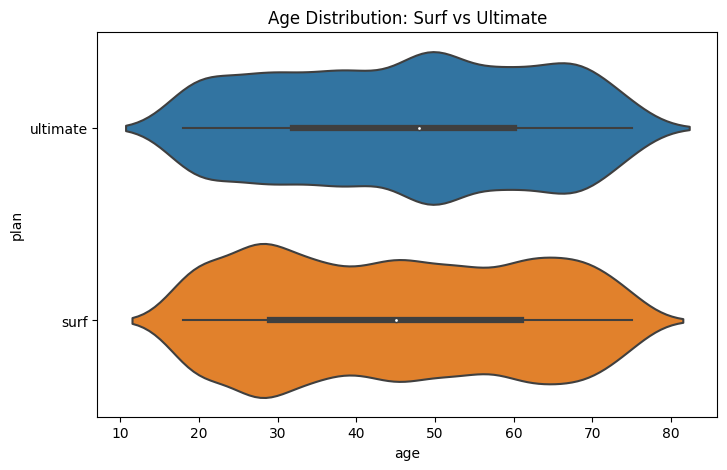

In [137]:
# Categorical vs Numerical (Cont.)
# Is there any correlation between the package and the user age?
plt.figure(figsize=(8, 5))
plt.title('Age Distribution: Surf vs Ultimate')
sns.violinplot(data=dataset, x='age', y='plan')
plt.show()

In [138]:
dataset.groupby(['plan']).mean()['age'].reset_index()

<ipython-input-138-1ee14d2d3fc9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['plan']).mean()['age'].reset_index()


,plan,age
0,surf,44.991053
1,ultimate,46.569444


In [139]:
dataset.groupby(['plan']).median()['age'].reset_index()

<ipython-input-139-6bba46c2c9ed>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(['plan']).median()['age'].reset_index()


,plan,age
0,surf,45.0
1,ultimate,48.0


Findings:

1. The average (mean) age of `surf` and `ultimate` users is not too different, it has **45** and **46.6**. And the median value is not too big, it has **45** and **48**.
2. Users of `surf` packages were more in demand by young people (at age range 20-30s ). While the `ultimate` package is used more by adults (at age range 45-55s).

Insights:

1. The `surf` package is more suitable for young people.
2. The `ultimate` package is more suitable according to the needs of well established people.

Recommendations:

1. Create a product that has benefits above `surf` type and below `ultimate` package to encourage youth generation interest for using a higher packages.

<ipython-input-140-e05fc3304663>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_income = dataset.groupby(['user_id', 'age']).sum()['usd_monthly_pay'].reset_index()


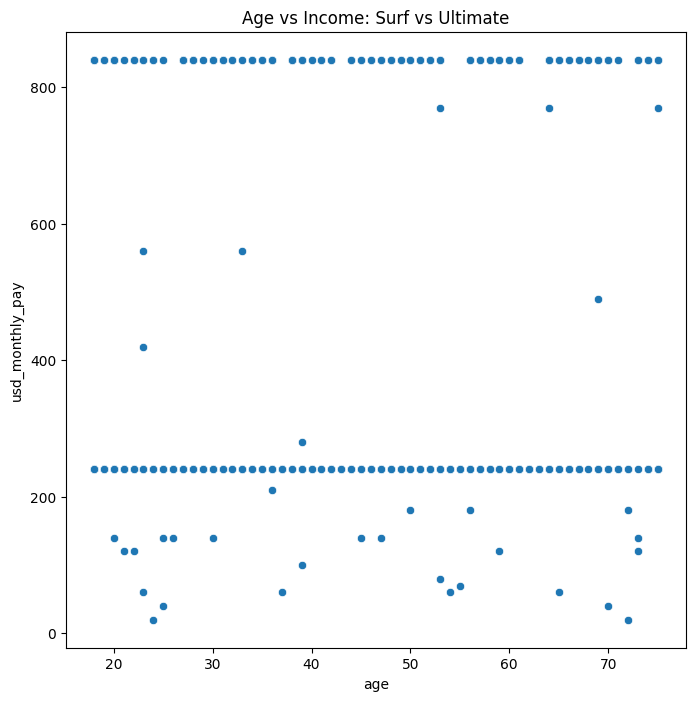

In [140]:
# Numerical Continuous vs Numerical Continuous
# Does the older the person, the more income they can generate?
age_income = dataset.groupby(['user_id', 'age']).sum()['usd_monthly_pay'].reset_index()

plt.figure(figsize=(8, 8))
plt.title('Age vs Income: Surf vs Ultimate')
sns.scatterplot(data=age_income, x='age', y='usd_monthly_pay')
plt.show()

**Conclusion**

Based on the above scatterplot graph, it can be concluded that **there is no correlation between age vs income**. Because the distribution map is static (flat)

In [141]:
# How many people pay the extra cost of internet on each plan?
dataset.loc[dataset.extra_internet > 0].groupby(['plan']).count()['user_id']

plan
surf        898
ultimate     41
Name: user_id, dtype: int64

Calculate the number of people who pay extra cost by plan

In [142]:
dataset.groupby(['plan']).count()['user_id']

plan
surf        3912
ultimate    1872
Name: user_id, dtype: int64

Count the number of people based on the plan

In [143]:
dataset.loc[dataset.extra_internet > 0].groupby(['plan']).count()['user_id'] / dataset.groupby(['plan']).count()['user_id'] * 100

plan
surf        22.955010
ultimate     2.190171
Name: user_id, dtype: float64

Calculate the percentage of each plan for users who pay extra costs

In [144]:
dataset.loc[dataset.extra_internet > 0].groupby(['plan']).mean()['extra_internet']

<ipython-input-144-b93c6a285d71>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.loc[dataset.extra_internet > 0].groupby(['plan']).mean()['extra_internet']


plan
surf        66.514477
ultimate    40.634146
Name: extra_internet, dtype: float64

The average (mean) for each user who chooses **extra internet** spent on the `surf` plan is **66.5 USD**. And then, for the `ultimate` plan it has lower than the surf, which is **40.6 USD**

Findings:

1. The `surf` plan has a total of **23%** or 898 users spending **extra internet**.
2. The `ultimate` plan has a total of **2.1%** or 41 users spending **extra internet**.
3. The average (mean) **extra internet** spending on the `surf` plan is **66.5 USD**, while on the `ultimate` plan it is **40.6 USD**.

Insights:

1. The price of the `surf` package is only **20 USD**, but **23%** of users who choose the package don't mind paying extra for the internet of **66.5 USD**, this is actually more expensive than paying users or upgrading to the `ultimate` package.
2. On the `ultimate` plan, only a few people choose to pay for extra internet, and even so, the average extra spending is no greater than the average extra spending on the `surf` package.

Recommendations:

1. Create a package that has an extra internet for customer. Because when we reviewed from the customer behavior, they need more **extra internet**.

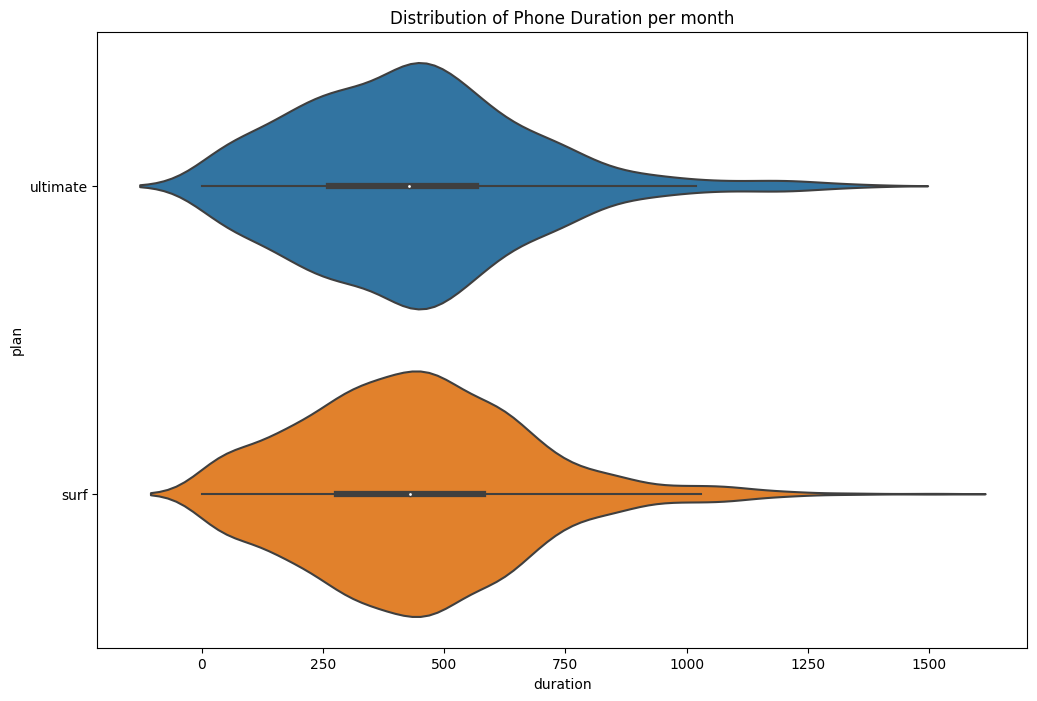

In [145]:
# How is the distribution of phone duration per month in each package?
plt.figure(figsize=(12, 8))
plt.title('Distribution of Phone Duration per month')
sns.violinplot(data=dataset, x='duration', y='plan')
plt.show()

Conclusion:

It can be concluded that there is almost no difference in the distribution of phone duration per month in each package

In [146]:
#Calculate the mean, variance, and standard deviation
pd.pivot_table(dataset, index='plan', values='duration', aggfunc=['mean', np.var, np.std])

,mean,var,std
,duration,duration,duration
plan,,,
surf,436.703289,52902.936921,230.006385
ultimate,434.446505,56780.313206,238.286200


Findings:

1. The average (mean) distribution of phone duration per month in each package has not much different
2. The variance of the distribution of phone duration per month in each package has not much different
3. The standard deviation of the distribution of phone duration per month in each package has also not much different

Insights:

1. Regardless of whatever package the customer chooses, be it `surf` or `ultimate`, the behavior shown remains the same

Recommendations:

There is no available recommendations for this case

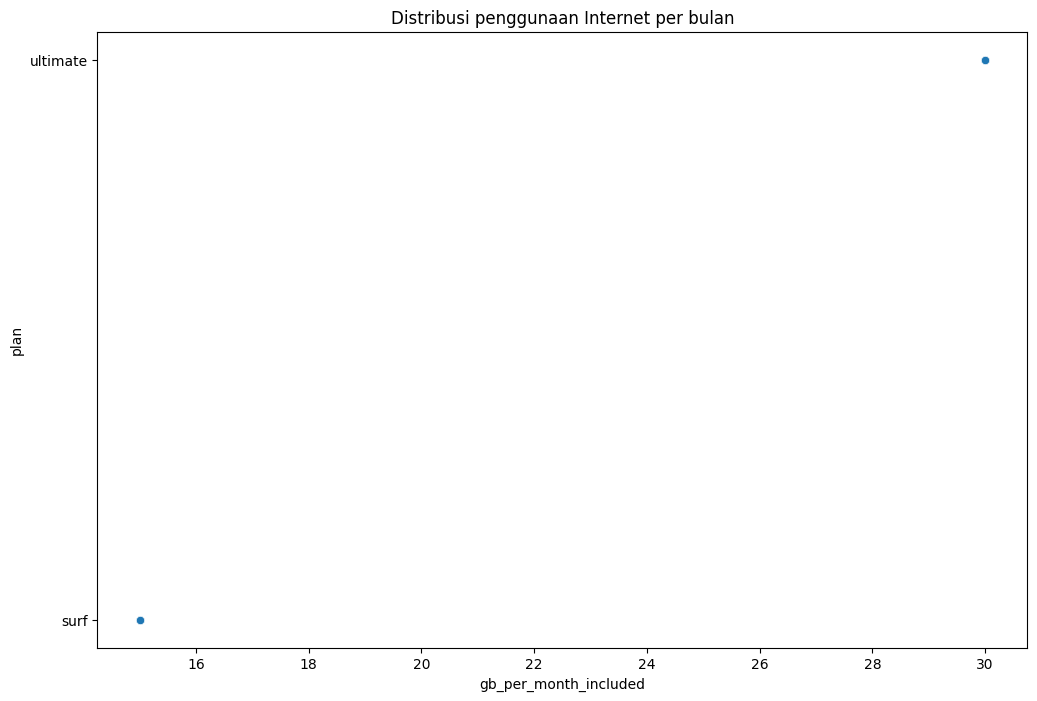

In [147]:
# How is the internet distribution per month in each package?
plt.figure(figsize=(12, 8))
plt.title('Distribution of Internet usage per month')
sns.scatterplot(data=dataset, x='gb_per_month_included', y='plan')
plt.show()

Conclusion:

The number of internet packages has been determined for each type of package, `surf` has **15GB** and `ultimate` has **30GB**

In [148]:
#Calculate the mean, variance, and standard deviation
pd.pivot_table(dataset, index='plan', values='gb_per_month_included', aggfunc=['mean', np.var, np.std])

,mean,var,std
,gb_per_month_included,gb_per_month_included,gb_per_month_included
plan,,,
surf,15.0,0.0,0.0
ultimate,30.0,0.0,0.0


Findings:

1. The average (mean) internet distribution per month in each package has been determined according to each product, for `surf` has **15GB** and `ultimate` has **30GB**
2. There is no variance in the distribution of phone duration per month in each package because the amount of quota in each package has been determined according to each product, for `surf` has **15GB** and `ultimate` has **30GB**
3. There is no standard deviation for the distribution of phone duration per month for each package because the amount of quota for each package has been determined according to each product, `surf` has **15GB** and `ultimate` has **30GB**

Insights:

1. Actually, each package has been determined according to its respective product, Surf is 15GB and Ultimate is 30GB. However, if we look at the extra internet usage, users who use the Surf package are more than users who use the Ultimate package. This should be considered furthermore.

Insights:

1. Actually, each package has been determined according to its respective product, `surf` has 15GB and `ultimate` has 30GB. However, if we look at the extra internet usage, customers who use the `surf` package are more than users who use the `ultimate` package. This should be considered further.

Recommendations:

1. Create a new package with **extra internet** quota above the `surf` package but below the `ultimate` package

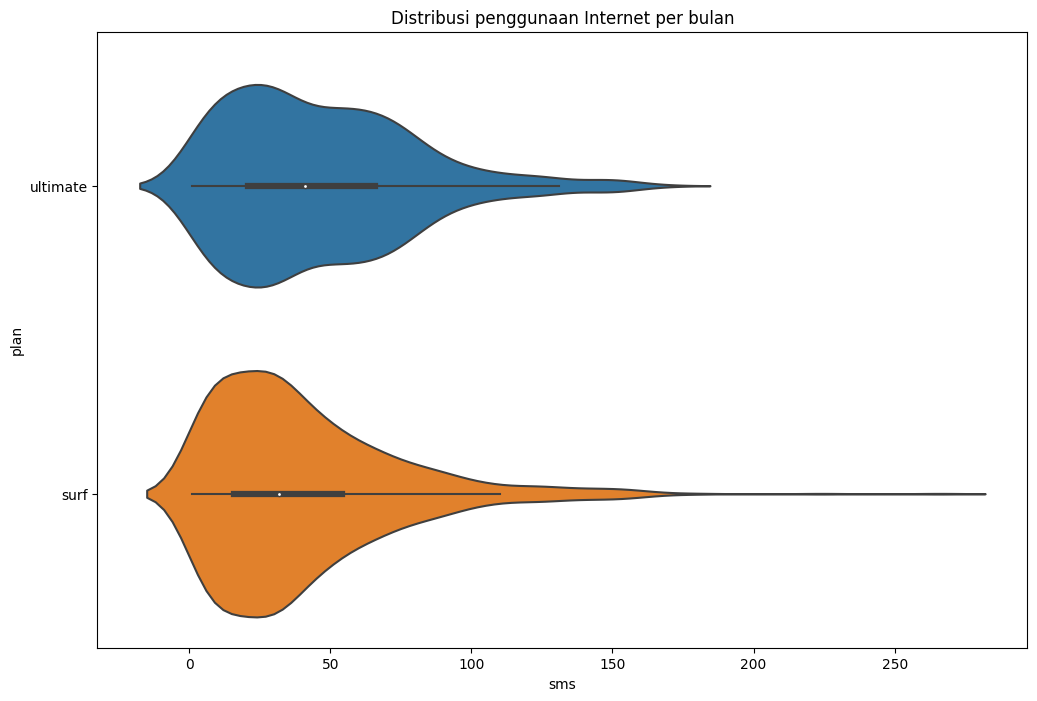

In [149]:
# How is the distribution of SMS per month in each package?
plt.figure(figsize=(12, 8))
plt.title('Distribution of Internet usage per month')
sns.violinplot(data=dataset, x='sms', y='plan')
plt.show()

Conclusion:

It can be concluded that there are differences in the distribution of SMS per month. On average, `surf` packages are **40 sms** per month. And then, the `ultimate` package is **47 sms** per month.

In [150]:
#Calculate the mean, variance, and standard deviation
pd.pivot_table(dataset, index='plan', values='sms', aggfunc=['mean', np.var, np.std])

,mean,var,std
,sms,sms,sms
plan,,,
surf,40.034081,1099.059570,33.152067
ultimate,46.621951,1090.403078,33.021252


Findings:

1. The average SMS distribution per month on the `surf` package is **40 sms** per month. And then, the `ultimate` package is **47 sms** per month.
2. The SMS distribution variance per month on the `surf` package has **1099 sms** per month. And then, the `ultimate` package has **1090 sms** per month.
3. The standard deviation of SMS distribution per month has not much different

Insights:

Regardless of whatever package the customer chooses, be it `surf` or `ultimate`, the behavior shown is almost the same. Although there is a slight gap occured.

Recommendations:

There is no available recommendations for this case

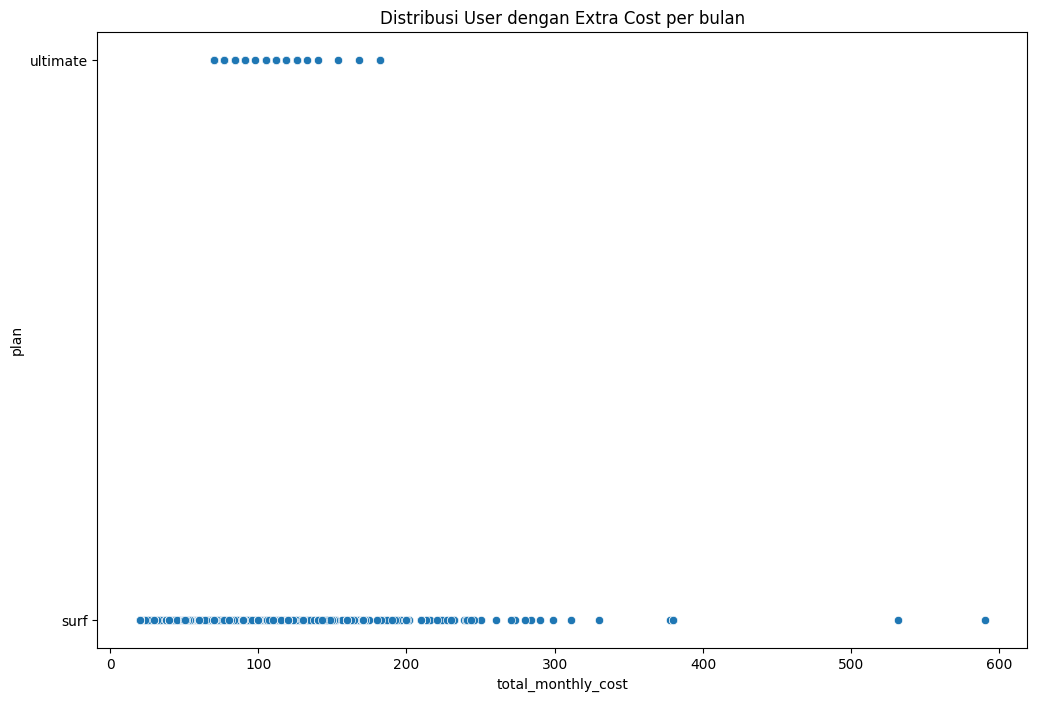

In [151]:
# How many people who pays extra cost for each plan?
plt.figure(figsize=(12, 8))
plt.title('Distribution of Customer with Extra Cost per Month')
sns.scatterplot(data=dataset, x='total_monthly_cost', y='plan')
plt.show()

**Conclusion**

It can be concluded that there is a difference in how many people pay extra per month for each plan. On average, `surf` packages has **36 USD** per month. And then, on the `ultimate` package has **70.8 USD** per month.

In [152]:
#Calculate the mean, variance, and standard deviation
pd.pivot_table(dataset, index='plan', values='total_monthly_cost', aggfunc=['mean', np.var, np.std])

,mean,var,std
,total_monthly_cost,total_monthly_cost,total_monthly_cost
plan,,,
surf,36.085805,1607.197353,40.089866
ultimate,70.889957,51.166933,7.153107


Findings:

1. The average (mean) distribution of the number of people who pay extra fees per month in each plan is **36 USD** per month. And then, on the `ultimate` package it has **70 USD** per month.
2. The distribution variance of the number of people who pay extra costs per month in each plan is **1607 USD** per month. And then, on the `ultimate` package it has **51 USD** per month. This is because many users pay extra for the `surf` package.
3. The standard deviation of the distribution of the number of people who pay extra fees per month for each plan is quite big. which is **40 USD** per month. And then, on the `ultimate` package it has **7 USD** per month.

Insights:

Customers who choose the `surf` package are more willing to pay an extra cost per month

Recommendations:

Create a package that has benefits above `surf` package but below `ultimate` package

# Step 4. Test the hypothesis

- The average revenue of `ultimate` and `surf` phone package customers is different.
- The average income of customers in the `NY-NJ` area is different from the customers income from other regions.

We will specify how much `"alpha"` value that will be used.

We calculate the **null hypothesis** and the **alternative hypothesis** using the `p-value` formula

We use the `Categoric vs Categoric` criteria to examine the two different types of categories, and the `Numerical Group` to examine numerical data.
           

# Statistical Testing

In [153]:
dataset.head()

,user_id,month,age,reg_date,plan,churn_date,clean_city,is_ny_nj,messages_included,mb_per_month_included,...,usd_per_message,usd_per_minute,gb_used,duration,sms,gb_per_month_included,extra_internet,extra_call,extra_sms,total_monthly_cost
0,1000,2018-01,45,2018-12,ultimate,NaT,GA,False,1000,30720,...,0.01,0.01,NaN,NaN,NaN,30.0,0.0,0.0,0.0,70.0
1,1000,2018-02,45,2018-12,ultimate,NaT,GA,False,1000,30720,...,0.01,0.01,NaN,NaN,NaN,30.0,0.0,0.0,0.0,70.0
2,1000,2018-03,45,2018-12,ultimate,NaT,GA,False,1000,30720,...,0.01,0.01,NaN,NaN,NaN,30.0,0.0,0.0,0.0,70.0
3,1000,2018-04,45,2018-12,ultimate,NaT,GA,False,1000,30720,...,0.01,0.01,NaN,NaN,NaN,30.0,0.0,0.0,0.0,70.0
4,1000,2018-05,45,2018-12,ultimate,NaT,GA,False,1000,30720,...,0.01,0.01,NaN,NaN,NaN,30.0,0.0,0.0,0.0,70.0


In [154]:
# p-value Equation
def verdict(p_value, alpha=0.05):
    print(f'P-Value: {round(p_value * 100, 2)}%')
    if p_value < alpha:
        print('H1 Accepted / H0 Rejected')
    else:
        print('H0 Accepted / H1 Rejected')

# 1. Categoric vs Categoric

- Method: Chi-Square
- Question: Is there a correlation between the average customers income in the `NY-NJ` area and customers income from other regions?
- Hypothesis:
     - H0: There is no correlation between the average customers income in the `NY-NJ` area and other regions
     - H1: There is a correlation between the average customers income in the `NY-NJ` area and other regions
- Alpha: 5%

In [155]:
#Correlations between the average customers income in `NY-NJ` area and customers income from other regions
pivot_cp = pd.pivot_table(dataset, index='plan', columns='is_ny_nj', values='user_id', aggfunc='nunique').fillna(0)
pivot_cp

is_ny_nj,False,True
plan,,
surf,279,60
ultimate,141,20


In [156]:
#Hypothesis p-value
p_value = chi2_contingency(pivot_cp)[1]
verdict(p_value)

P-Value: 16.97%
H0 Accepted / H1 Rejected


**Conclusion**

There is no correlation between the average customers income in `NY-NJ` area and other areas

# 2. Categoric vs Categoric

- Method: Independent T-test
- Question: Is there any correlations between the average income of `ultimate` and `surf` phone plan customers?
- Hypothesis:
     - H0: Average internet usage in `surf` and `ultimate` packages are the same
     - H1: Average internet usage in `surf` and `ultimate` packages is different
- Alpha: 5%

In [157]:
#Average internet usage in the `ultimate` package
inter_ulti = dataset.loc[(dataset.plan == 'ultimate') & ~(dataset.gb_used.isna()), 'gb_used']
#Average internet usage in the `surf` package
inter_surf = dataset.loc[(dataset.plan == 'surf') & ~(dataset.gb_used.isna()), 'gb_used']

In [158]:
print(inter_ulti.mean())
print(inter_surf.mean())

17.35926449787836
16.834964122635355


In [159]:
#Variances in Ultimate and Surf package
print(inter_ulti.var())
print(inter_surf.var())

58.95856489736387
59.32979498892085


In [160]:
# p-value hypothesis
p_value2 = ttest_ind(inter_ulti, inter_surf, equal_var=True).pvalue
verdict(p_value2)

P-Value: 13.41%
H0 Accepted / H1 Rejected


**Conclusion**

The average internet usage in the `surf and `ultimate` packages are the same

# Step 5. Overall Conclusion

Based on the data we used, we have 5 types of datasets as below:
- `megaline_calls.csv`
- `megaline_internet.csv`
- `megaline_messages.csv`
- `megaline_plans.csv`
- `megaline_users.csv`

Each dataset has different columns, so we have to combine several tables to get the appropriate information. Then, we do the analysis by making appropriate questions to describe consumer behavior.

After we do the analysis, we do a hypothesis test to draw conclusions on what we have analyzed. In this case we find that the average use of the `surf` and `ultimate` packages are the same, but in some cases the customer preferred to use the `surf` package with extra internet.

Therefore, it is necessary to create a new product that is equivalent to the `surf` package but with extra internet added.